<center>
    <tr>
    <td><img src="ontario-tech-univ-logo.png" width="25%"></img></td>
    </tr>
</center>

# Object detection and localization using YOLO

Faisal Qureshi   
Professor    
Faculty of Science    
Ontario Tech University    
Oshawa ON Canada    
http://vclab.science.ontariotechu.ca

## Copyright information

&copy; Faisal Qureshi

## License

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

## Introduction

The goal of this lab is to learn how to use YOLO ([Redmon et al. 2015](https://arxiv.org/abs/1506.02640)) deep learning framework for object detection and localization.  Specifically, we will use YOLO to detect road signs in [https://www.kaggle.com/datasets/andrewmvd/road-sign-detection](https://www.kaggle.com/datasets/andrewmvd/road-sign-detection).  

YOLO (You Only Look Once) is a real-time object detection algorithm that processes images in a single pass, predicting both bounding boxes and class probabilities (Figure 1). 

<center>
    <img src="yolo-fig-1.png" width="60%">
    <p><strong>Figure 1: </strong>YOLO predicts object classes and their bounding boxes. (Figure from Redmon et al. 2015.  )</p>
</center>

### Convolutional layers extract features

YOLO utilizes a series of convolutional layers to extract features from input images (Figure 2).  It divides the input image into a grid and makes predictions based on the features extracted from each grid cell.  

<center>
    <img src="yolo-architecture.png" width="60%">
    <p><strong>Figure 2: </strong>24 convolutional layers followed by 2 fully connected layers. Alternating 1 × 1
convolutional layers reduce the features space from preceding layers. The convolutional layers are pretrained on the ImageNet classification
task at half the resolution (224 × 224 input image) and then double the resolution for detection. (Figure from Redmon et al. 2015.)</p>
</center>

## Learning outcomes

- Setting up YOLO
- Using YOLO for object detection and localization
- Training YOLO on your dataset(s)

### What to submit

<p style="color: red;">
Go to the end of this notebook to see what you need to submit.
</p>

## Setting up YOLO via commandline

We will use YOLO implementation by [Ultralytics](https://www.ultralytics.com/yolo).  You can get detailed information about how to setup and use YOLO on your machine at [https://docs.ultralytics.com/yolov5/](https://docs.ultralytics.com/yolov5/).  

### Downloading YOLO

~~~bash
$ git clone https://github.com/ultralytics/yolov5.git
~~~

This download YOLO in `yolov5` folder. 

### Setting up the Python environment

~~~bash
$ python3 -m venv venv-yolov5
$ source venv-yolov5/bin/activate
(venv-yolov5) $ pip install -r yolov5/requirements.txt
~~~

### Running YOLO on commandline

#### Performing inference on an image

Use the following command to use YOLO to perform object detection on a image.

~~~bash
(venv-yolov5) $ python detect.py --source data/images/bus.jpg --view
~~~

<center>
    <img src="yolo-on-bus.png" width="40%">
<p><strong>Figure 3</strong> YOLO object detection.</p>
</center>

#### Performing inference on webcam video

Use the following command to use YOLO to perform object detection on the video captured by your webcam.  

~~~bash
(venv-yolov5) $ python detect.py --source 0
~~~

Aside: my laptop has one webcam, whose id is 0.  If only a single webcam is attached to your machine then most likely its id will be 0. 

#### More options

Check out the `detect.py` to see the commandline options available to you.  E.g., it is possible to perform object detection on images stored in a folder, video, etc.  

Check 

~~~bash
(venv-yolov5) $ python detect.py --help
~~~

for a complete list of available commandline options.

## YOLO Variants

YOLO comes in many variants, i.e., different network sizes.  By default the network downloads `yolov5s.pt` model.  You can, however, specify other models.   

<center>
    <img src="yolov5-pre-trained-models.png" width="70%">
    <p><strong>Figure 3</strong>YOLO v5 variants.</p>
</center>

### Example: Tiny YOLO

For example, we can specify to use the tiny YOLO when performing inference as follows:

~~~bash
(venv-yolov5) $ python detect.py --weights yolov5n.pt  --source data/images/bus.jpg
~~~

Note that the program will download the pretrained weights, `yolov5n.pt`, as needed.

## Using YOLO within the Jupyter environment

In the previous examples, we have used YOLO from the commandline.  It is also possible to use YOLO from within the Jupyter environment.

### Install YOLO within the Jupyter environment

In [1]:
%pip install --quiet ultralytics

Note: you may need to restart the kernel to use updated packages.


### Use YOLO in Jupyter Lab

Next, within the Jupyter lab environment you can use YOLO to perform inference.  YOLO downloads the weights as needed.

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs

image 1/1 C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Labs\Lab4\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 182.5ms
Speed: 5.0ms preprocess, 182.5ms inference, 15.0ms postprocess per image at shape (1, 3, 640, 480)


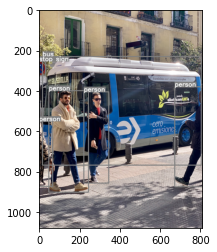

In [2]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')
model.info()
results = model('bus.jpg')

from ultralytics.utils.plotting import Annotator
import matplotlib.pyplot as plt
import cv2

annotator = Annotator(cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB))
boxes = results[0].boxes
for box in boxes:
    b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
    c = box.cls
    annotator.box_label(b, model.names[int(c)])

plt.imshow(annotator.result())

## Training YOLO

Now that we are able to use YOLO for out-of-the-box object detection.  We will turn our attention to training YOLO on our dataset.  We will use the COCO128 to experiment with model training.  

### COCO128 Dataset

Download the COCO128 dataset from [https://www.kaggle.com/datasets/ultralytics/coco128](https://www.kaggle.com/datasets/ultralytics/coco128).  *You may need to create a free [Kaggle](https://www.kaggle.com/) account in order to download this dataset.*  You can also download COCO128 from [here](https://drive.google.com/drive/folders/13yGcWJ5_NAVY7yYlkUxSGhjqIgsu-lY6?usp=sharing).  I am hosting COCO128 for the purposes of this course only.

#### Anatomy of the COCO128

Once downloaded the COCO128 folder looks as shown below.

~~~bash
(venv-yolov5) $ coco128 tree -L 2
.
├── LICENSE
├── README.txt
├── images
│   └── train2017
└── labels
    └── train2017
~~~

**Important:** note that the folder doesnot contain any test images.  This is a toy dataset that is used for the purposes of understanding YOLO training regime.  The same set of images are used for both training and testing.

The dataset consists of two top-level folder: `images` and `labels`:

- `images/train2017` folder contains images;
- `labels/train2017` folder contains text files, one per image, that include annoations.  For example, see Figure 4 below

##### Annotation files

The annotation files contain one object annotation per line using the following format

~~~txt
class-id centerx centery width height
~~~

- `class-id` denotes object class.  This information is found in an accompanying yaml file, e.g., [coco128.yaml](06-object-detection-using-yolo/coco128.yaml), that describes the dataset.  
- The image is resized to have height and width equal to $1$, and `centerx`, `centery`, `width` and `height` is described within the normalized coordinates.

Figure 4 illustrates YOLO annotations:

<center>
    <img src="zidan-annotated.jpeg" width="50%">
    <p><strong>Figure 4</strong> Image 000000000036.jpg</p>    
</center>

#### Example images with annotation files

<center>
    <img src="000000000081.jpg" width="50%">
    <p><strong>Figure 5</strong> Image 000000000081.jpg</p>
</center>

The corresponding annotation file is `000000000081.txt`

~~~txt
4 0.516492 0.469388 0.912516 0.748282
~~~

Similarly, consider Figure 5 below

<center>
    <img src="000000000036.jpg" width="30%">
    <p><strong>Figure 6</strong> Image 000000000036.jpg</p>
</center>

The corresponding annotation file is `000000000036.txt`

~~~txt
25 0.475759 0.414523 0.951518 0.672422
0 0.671279 0.617945 0.645759 0.726859
~~~

### Training on COCO128 dataset

YOLO requires a YAML file that describes the dataset.  See [coco128.yaml](06-object-detection-using-yolo/coco128.yaml) that we will use to train YOLO on COCO128 dataset. `coco128.yaml` file has the following structure.

~~~
path: "/Users/faisal/Dropbox/Teaching/My Courses/2023-2024/Winter 2024/csci-4220u-winter-2024/webpage-source/labs/data/datasets-do-not-upload/coco128" 
train: images/train2017 
val: images/train2017 
test: (optional)
names:
  0: person
  1: bicycle
...
download: download-script-or-data-url (OPTIONAL)
~~~

- `path`: path of the root directory for the dataset.
- `train`: path of the directory containing training images (relative to `path`).  
- `val`: path of the directory containing validation images (relative to `path`).
- `test`: path of the directory containing test images (relative to `path`).  This is *optional*.
- `names`: list of class indices and their names
- `download`: download link or a script.  This is *optional*.

Note that annotations files are loaded from the mirror path(s).  E.g., for training images:
    
- Images are loaded from `images/train2017`; and
- Corresponding annotation files are loaded from `labels/train2017`.

I edited the default `coco128.yaml` file to suit my setup.  I only had to update the path to the root folder for COCO128. 

~~~txt
...
path: "/Users/faisal/Dropbox/Teaching/My Courses/2023-2024/Winter 2024/csci-4220u-winter-2024/webpage-source/labs/data/datasets-do-not-upload/coco128" 
...
~~~

### Pretrained model

It is recommended to use a pre-trained YOLO model and "further train" it on your datasets.

In [3]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # load a pretrained model
model.info()

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

#### Inference using pretrained model

Let's use this model to perform inference.  Since this is a pretrained model, it already does quite well at person detection.  The model found both Zidane and Ancelloti. 


image 1/1 C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Labs\Lab4\zidane.jpg: 384x640 2 persons, 1 tie, 109.7ms
Speed: 4.0ms preprocess, 109.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


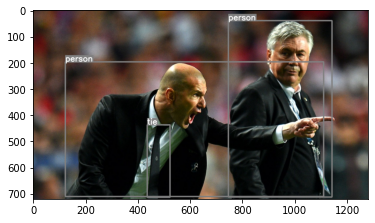

In [4]:
results = model(source='zidane.jpg')

from ultralytics.utils.plotting import Annotator
import matplotlib.pyplot as plt
import cv2

annotator = Annotator(cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB))
boxes = results[0].boxes
for box in boxes:
    b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
    c = box.cls
    annotator.box_label(b, model.names[int(c)])

plt.imshow(annotator.result())

### Training a model from scratch

It is also possible, although not recommended, to train a model from scratch. 

In [5]:
from ultralytics import YOLO

model = YOLO('yolov8n.yaml')  # Using yolov8n structure, but randomly initialized weights
model.info()

YOLOv8n summary: 225 layers, 3157200 parameters, 3157184 gradients, 8.9 GFLOPs


(225, 3157200, 3157184, 8.8575488)

#### Inference using a randomly initialized model

Let's use this model to perform inference.  Recall that this model is not pretrained.

You'll notice that the model fails to find both Zidane and Ancelotti.


image 1/1 C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Labs\Lab4\zidane.jpg: 384x640 (no detections), 143.6ms
Speed: 4.0ms preprocess, 143.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


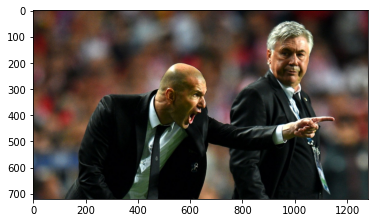

In [6]:
results = model(source='zidane.jpg')

from ultralytics.utils.plotting import Annotator
import matplotlib.pyplot as plt
import cv2

annotator = Annotator(cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB))
boxes = results[0].boxes
for box in boxes:
    b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
    c = box.cls
    annotator.box_label(b, model.names[int(c)])

plt.imshow(annotator.result())

### Training: other considerations

Check out [https://docs.ultralytics.com/modes/train/#arguments](https://docs.ultralytics.com/modes/train/#arguments) for a list of arguments for `train` method.  Especially check out `freeze` argument:

> Freezes the first N layers of the model or specified layers by index, reducing the number of trainable parameters. Useful for fine-tuning or transfer learning.

In [7]:
from ultralytics import YOLO

use_pretrained = True

if use_pretrained:
    print('Using a pretrained model')
    model = YOLO('yolov8n.pt')  # load a pretrained model
else:
    print('Using a scratch model')
    model = YOLO('yolov8n.yaml') # load a scratch model

model.info()

device = 'mps' # Since I am running this on Apple Silicon
epochs = 1
data = 'coco128.yaml'

# Uncomment the following to train
# This takes a while
#results = model.train(data=data, epochs=epochs, device=device);

Using a pretrained model
YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


<div style="color: magenta">

## Self-Test

At this point, please confirm that you are able to complete the following tasks:

1. Install ultralytics YOLO distribution.
2. Use pretrained YOLO model to detect objects in images/videos.
    - You should also be able to visualize the object detection results. 
3. Download COCO128 dataset and be familiar with the yaml file that describes its structure.
4. Train a YOLO model from scratch on COCO128 dataset.
    - Use the trained YOLO model to detect objects in images from the COCO128 dataset
  
</div>

## Train YOLO to detect road signs

Recall the very first lab of this course.  There you were asked to use template matching techniques to identify the stop signs in [https://www.kaggle.com/datasets/andrewmvd/road-sign-detection](https://www.kaggle.com/datasets/andrewmvd/road-sign-detection).  The dataset is also available [here](https://drive.google.com/drive/folders/1MAv77UPChcZneJr4ik4X3i8s9AYFC2-B?usp=drive_link).  I have made it available for educational purposes.

You are now ready to use YOLO to detect road signs in this dataset.  Let's do that.  You'll need to complete the following tasks.

### Convert road-sign-detection dataset to use YOLO annotations.

Recall that road sign detection dataset annotation are stored in XML format.

Example `road0.xml`

~~~txt
<annotation>
    <folder>images</folder>
    <filename>road0.png</filename>
    <size>
        <width>267</width>
        <height>400</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>trafficlight</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>98</xmin>
            <ymin>62</ymin>
            <xmax>208</xmax>
            <ymax>232</ymax>
        </bndbox>
    </object>
</annotation>
~~~

We need to convert this into the annotation format used by YOLO.  Check the section on COCO128 dataset.

<div style="color: blue;">

#### Data pipelines

Deep learning belongs to the category of data-driven approaches.  Consequently, a big part of developing deep learning solutions is to construct efficient and highly scalable data pipelines.  Once the data pipeline is in place, it is much easier to develop deep learning models and capture their performance.

In this lab, you are asked to take the road-sign-detection dataset and transform it into a form that YOLO can understand.  The lessons learned here will be useful as you develop larger, more sophisticated deep learning models.

</div>

#### Constructing YOLO data pipeline from road-sign-detection dataset

The following code taken from [https://blog.paperspace.com/train-yolov5-custom-data/](https://blog.paperspace.com/train-yolov5-custom-data/) does just that.  It takes an XML file and outputs annotations found within as YOLO format.  The code also create txt files, one per image, to store the annotations.  This is similar to how COCO128 dataset is structured.

In [12]:
import xml.etree.ElementTree as ET

# Function to get the data from XML Annotation
def extract_info_from_xml(xml_file):
    root = ET.parse(xml_file).getroot()
    
    # Initialise the info dict 
    info_dict = {}
    info_dict['bboxes'] = []

    # Parse the XML Tree
    for elem in root:
        # Get the file name 
        if elem.tag == "filename":
            info_dict['filename'] = elem.text

        # Get the image size
        elif elem.tag == "size":
            image_size = []
            for subelem in elem:
                image_size.append(int(subelem.text))
            
            info_dict['image_size'] = tuple(image_size)
        
        # Get details of the bounding box 
        elif elem.tag == "object":
            bbox = {}
            for subelem in elem:
                if subelem.tag == "name":
                    bbox["class"] = subelem.text
                    
                elif subelem.tag == "bndbox":
                    for subsubelem in subelem:
                        bbox[subsubelem.tag] = int(subsubelem.text)            
            info_dict['bboxes'].append(bbox)
    
    return info_dict

# Dictionary that maps class names to IDs
class_name_to_id_mapping = {"trafficlight": 0,
                           "stop": 1,
                           "speedlimit": 2,
                           "crosswalk": 3}

# Convert the info dict to the required yolo format and write it to disk
def convert_to_yolov5(info_dict, rootpath='.', write_to_file=False):
    print_buffer = []
    
    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print("Invalid Class. Must be one from ", class_name_to_id_mapping.keys())
        
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]  
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 
        
        #Write the bbox details to the file 
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))

    if write_to_file:
        # Name of the file which we have to save 
        save_file_name = os.path.join(rootpath, "annotations", info_dict["filename"].replace("png", "txt"))
    
        # Save the annotation to disk
        print("\n".join(print_buffer), file= open(save_file_name, "w"))
    else:
        return print_buffer 

In [13]:
xml_file = 'road0.xml'
xml_info = extract_info_from_xml(xml_file)
print('xml_info:\n', xml_info)

yolo_annotations = convert_to_yolov5(xml_info)
print('yolo_annotations:\n', yolo_annotations)

xml_info:
 {'bboxes': [{'class': 'trafficlight', 'xmin': 98, 'ymin': 62, 'xmax': 208, 'ymax': 232}], 'filename': 'road0.png', 'image_size': (267, 400, 3)}
yolo_annotations:
 ['0 0.573 0.367 0.412 0.425']


You can use the above methods to iterate through all XML files and construct the text annotation files as follows.  <p style="color: red">!!! Note that the following code will create one text file per xml file in the xml file folder. !!!</p>

In [14]:
import os
!pip install tqdm
from tqdm import tqdm

# Rootpath indicates the root folder where you have stored the road-sign-detection dataset
rootpath = "C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Labs/Lab1/dataset/archive"

annotations = [os.path.join(rootpath,'annotations', x) for x in os.listdir(os.path.join(rootpath,'annotations')) if x[-3:] == "xml"]
annotations.sort()

for ann in tqdm(annotations):
    info_dict = extract_info_from_xml(ann)
    convert_to_yolov5(info_dict, rootpath=rootpath, write_to_file=True)
annotations = [os.path.join(rootpath,'annotations', x) for x in os.listdir(os.path.join(rootpath,'annotations')) if x[-3:] == "txt"]

100%|███████████████████████████████████████████████████████████████████████████████| 877/877 [00:04<00:00, 175.58it/s]


#### Check annotations

It is wise to check the annotations.  Check out the annotation code above to see how you can draw bounding boxes and class labels on the images.

In [15]:
annotations # change the xml file to txt file  

['C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Labs/Lab1/dataset/archive\\annotations\\road0.txt',
 'C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Labs/Lab1/dataset/archive\\annotations\\road1.txt',
 'C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Labs/Lab1/dataset/archive\\annotations\\road10.txt',
 'C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Labs/Lab1/dataset/archive\\annotations\\road100.txt',
 'C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Labs/Lab1/dataset/archive\\annotations\\road101.txt',
 'C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Labs/Lab1/dataset/archive\\annotations\\road102.txt',
 'C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Labs/Lab1/dataset/archive\\annotations\\road103.txt',
 'C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Labs/Lab1/dataset/archive\\annotations\\roa

#### Split data into train, validation, and test sets

The following code construct 6 lists:  

- train_images;
- train_annotations;
- val_images;
- val_annotations;
- test_images; and
- test_annotations.

Each list contain filenames. 

In [9]:
import random
!pip install --quiet scikit-learn
from sklearn.model_selection import train_test_split

images = [os.path.join(rootpath, 'images', x) for x in os.listdir(os.path.join(rootpath, 'images'))]
annotations = [os.path.join(rootpath,'annotations', x) for x in os.listdir(os.path.join(rootpath,'annotations')) if x[-3:] == "txt"]

images.sort()
annotations.sort()

train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

NameError: name 'os' is not defined

##### Moving/copying images to their respective folders

Move train, validation and test files (images and annotations) to their own directories.  For the road sign detection dataset you can use the following layout (inspired by COCO128).

~~~txt
➜  road-sign-detection tree .
.
├── images
│   ├── test
│   ├── train
│   └── val
└── labels
    ├── test
    ├── train
    └── val
~~~

This process can be easily automated using Python shell utilities package.

In [21]:
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

<!--
The above method is able to move files as 

~~~python
move_files_to_folder(train_images, 'images/train')
move_files_to_folder(val_images, 'images/val/')
move_files_to_folder(test_images, 'images/test/')
move_files_to_folder(train_annotations, 'labels/train/')
move_files_to_folder(val_annotations, 'labels/val/')
move_files_to_folder(test_annotations, 'labels/test/')
~~~
-->

#### Create a data (yaml) file that YOLO will use to train on the road-sign-detection dataset.

The yaml file that describes the road-sign-detection dataset will look something like

~~~
path: /path/to/Road_Sign_Dataset
train: images/train/ 
val:  images/val/
test: images/test/

nc: 4

names: ["trafficlight", "stop", "speedlimit",  "crosswalk"]
~~~

### YOLO models for road sign detection

Now you have everything that you need to train YOLO to detect road signs.

<div style="color: darkgreen">

## TO DO

1. Construct a pretrained YOLO and capture its performance on the test set without any training.
2. Construct a pretrained YOLO.  Train it for 5 epochs on the training set.  Then capture its performance on the test set.
3. Train a YOLO from scratch for 5 and 15 epochs on the training set.   Then capture its performance on the test set.
4. Construct a table that compares the performance obtained under various settings.
5. Pick a small subset of test images and show qualitative results under various settings.

Train, validation and test sets here refer to the road-sign-detection dataset.

**Important** Let's use Tiny YOLO for these experiments.

</div>

<div style="color: magenta;">
<h2>Jupyter notebook</h2>

Source notebook is available <a href="06-object-detection-using-yolo.ipynb">here</a>.
</div>

## What to submit

1. Table constructed in step 4.
2. Qualitative results in step 5.
3. Model weights in steps 1, 2, and 3.

## GPU resources

(Experimental) You can use the GPU resources available at [https://hubdev.science.ontariotechu.ca/](https://hubdev.science.ontariotechu.ca/) to complete your lab. 

<center>
    <tr>
    <td><img src="ontario-tech-univ-logo.png" width="25%"></img></td>
    </tr>
</center>